# Rによるやさしい統計学
# 第I部
# 第2章

In [1]:
options(repr.plot.width = 4, repr.plot.height = 4)

In [2]:
teaching <- c("C","B","B","A","B","C","A","D","D","D","A", "A", "A","C","B","D","C","C","B","D")

In [3]:
table(teaching)

teaching
A B C D 
5 5 5 5 

In [4]:
psychology <- c(13,14,7,12,10,6,8,15,4,14,9,6,10,12,5,12,8,8,12,15)

In [5]:
library(ggplot2)

Warning message:
: package ‘ggplot2’ was built under R version 3.2.4

In [6]:
sort(psychology)

[1]  4  5  6  6  7  8  8  8  9 10 10 12 12 12 12 13 14 14 15 15

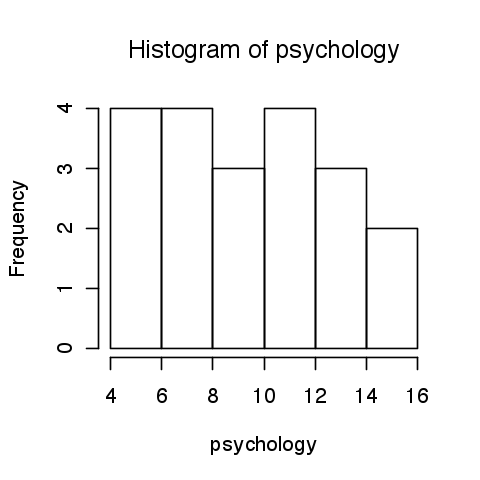

In [7]:
hist(psychology)

In [8]:
hist(psychology, plot=F)

$breaks
[1]  4  6  8 10 12 14 16

$counts
[1] 4 4 3 4 3 2

$density
[1] 0.100 0.100 0.075 0.100 0.075 0.050

$mids
[1]  5  7  9 11 13 15

$xname
[1] "psychology"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"

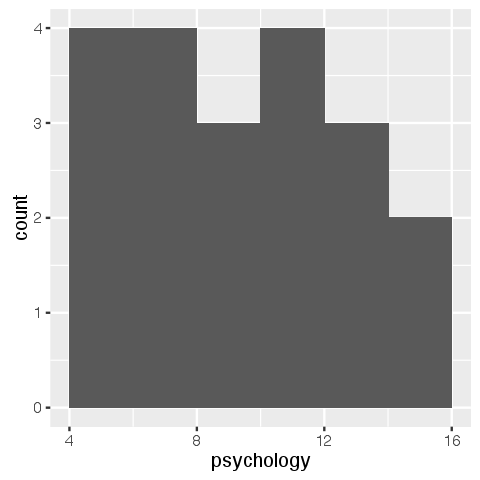

In [9]:
ggplot(data = data.frame(psychology), aes(x = psychology)) + 
    geom_histogram(breaks = hist(psychology, plot=FALSE)$breaks)

* 平均値

In [10]:
testA <- c(10,13,8,15,8)
sum(testA)

[1] 54

In [11]:
sum(testA) / length(testA)

[1] 10.8

In [12]:
mean(testA)

[1] 10.8

* 中央値

In [13]:
median(testA)

[1] 10

* 最頻値

In [14]:
table(testA)

testA
 8 10 13 15 
 2  1  1  1 

In [15]:
str(table(testA))

 'table' int [1:4(1d)] 2 1 1 1
 - attr(*, "dimnames")=List of 1
  ..$ testA: chr [1:4] "8" "10" "13" "15"


In [16]:
which.max(table(testA))

8 
1

* 分散，標準偏差

* 不偏分散

In [17]:
var(testA)

[1] 9.7

* これは標本分散

In [18]:
my_var <- function(x){
    m <- mean(x)
    dsq <- (x - m)^2
    return(sum(dsq) / length(x))
}
my_var(testA)

[1] 7.76

In [19]:
var(testA) * (length(testA) - 1) / length(testA)

[1] 7.76

In [20]:
my_var(testA) *  length(testA) / (length(testA) - 1)

[1] 9.7

In [21]:
sd(testA)

[1] 3.114482

In [22]:
sqrt(my_var(testA))

[1] 2.785678

In [23]:
sqrt(my_var(testA) *  length(testA) / (length(testA) - 1))

[1] 3.114482

* 平均偏差

In [24]:
library(pipeR)

Warning message:
: package ‘pipeR’ was built under R version 3.2.4

In [25]:
(testA - mean(testA)) %>>% abs %>>% mean

[1] 2.56

* 範囲

In [26]:
max(testA) - min(testA)

[1] 7

## 2.10 標準化

In [27]:
psychology

[1] 13 14  7 12 10  6  8 15  4 14  9  6 10 12  5 12  8  8 12 15

In [28]:
psy_mean <- mean(psychology)
psy_mean

[1] 10

In [29]:
psy_sd <- (psychology - psy_mean)^2 %>>% mean %>>% sqrt
psy_sd

[1] 3.331666

In [30]:
z_score <- (psychology - psy_mean) / psy_sd
z_score

[1]  0.9004503  1.2006005 -0.9004503  0.6003002  0.0000000 -1.2006005
 [7] -0.6003002  1.5007506 -1.8009007  1.2006005 -0.3001501 -1.2006005
[13]  0.0000000  0.6003002 -1.5007506  0.6003002 -0.6003002 -0.6003002
[19]  0.6003002  1.5007506

In [31]:
mean(z_score)

[1] -2.753874e-18

In [32]:
(z_score - mean(z_score))^2 %>>% mean %>>% sqrt

[1] 1

## 2.11 偏差値

In [33]:
std_score <- 10 * z_score + 50
std_score

[1] 59.00450 62.00600 40.99550 56.00300 50.00000 37.99400 43.99700 65.00751
 [9] 31.99099 62.00600 46.99850 37.99400 50.00000 56.00300 34.99249 56.00300
[17] 43.99700 43.99700 56.00300 65.00751

In [34]:
mean(std_score)

[1] 50

In [35]:
(std_score - mean(std_score))^2 %>>% mean %>>% sqrt

[1] 10

## 練習問題

In [36]:
a <- c(60, 100, 50, 40, 50, 230, 120, 240, 200, 30)
b <- c(50, 60, 40, 50, 100, 80, 30, 20, 100, 120)

In [37]:
options(repr.plot.width = 8, repr.plot.height = 4)

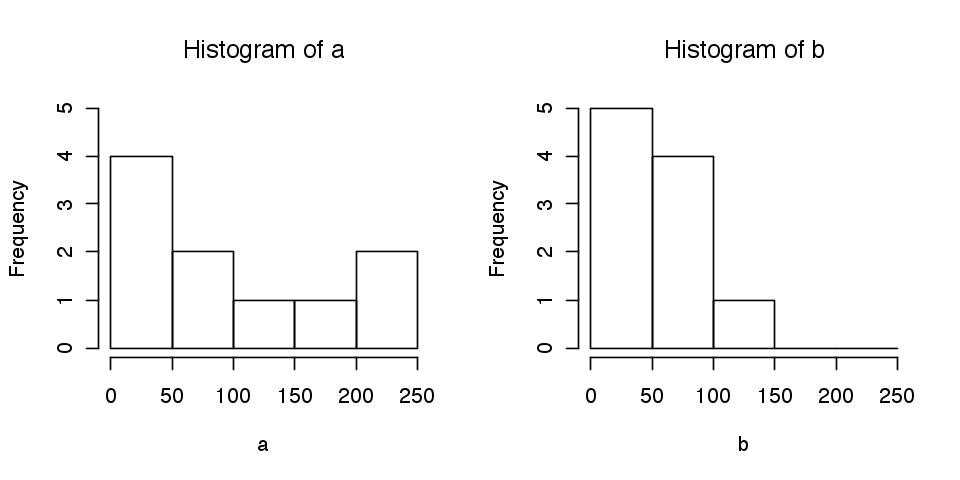

In [38]:
layout(matrix(c(1, 2), 1, 2, byrow = TRUE))
hist(a, ylim = c(0, 5))
hist(b, breaks = hist(a, plot=FALSE)$breaks)

In [39]:
library(tidyr)

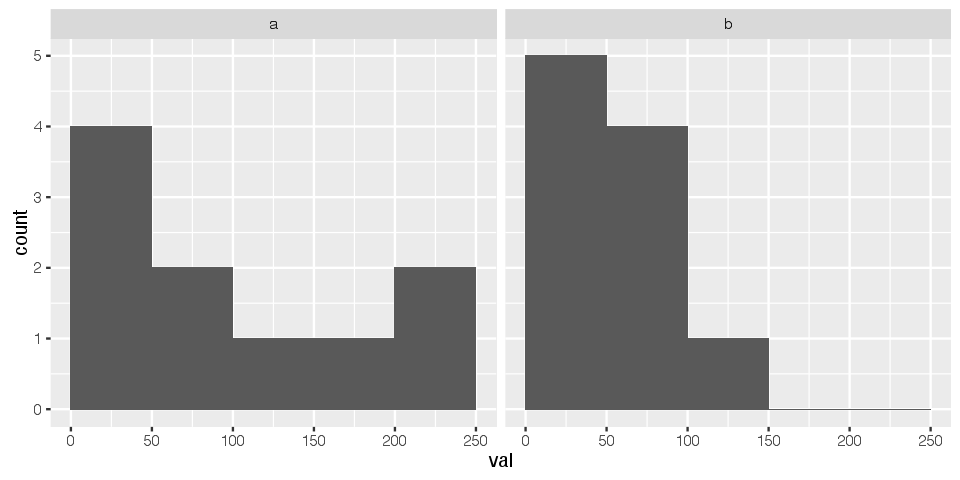

In [40]:
data.frame(a = a, b = b) %>>% 
    tidyr::gather(key, val, a:b) %>>% 
    ggplot(aes(x = val)) + 
        geom_histogram(breaks = hist(a, plot = FALSE)$breaks) -> gp
gp + facet_wrap(~key)

In [41]:
sd_a <- (a-mean(a))^2 %>>% mean %>>% sqrt
sd_b <- (b-mean(b))^2 %>>% mean %>>% sqrt
cat("Aの平均: ", mean(a), ", 標準偏差: ", sd_a, "\n")
cat("Aの平均: ", mean(b), ", 標準偏差: ", sd_b, "\n")

Aの平均:  112 , 標準偏差:  77.82031 
Aの平均:  65 , 標準偏差:  31.70173 


> * [分散はnで割るかn-1で割るか](http://oku.edu.mie-u.ac.jp/~okumura/stat/var_or_varp.html)

* AのZ得点

In [42]:
z_a <- (a - mean(a)) / sd_a
z_a

[1] -0.6682061 -0.1542014 -0.7967072 -0.9252084 -0.7967072  1.5163138
 [7]  0.1028009  1.6448149  1.1308103 -1.0537096

In [43]:
mean(z_a)

[1] -4.18502e-18

In [44]:
(z_a - mean(z_a))^2 %>>% mean %>>% sqrt

[1] 1

* BのZ得点

In [45]:
z_b <- (b - mean(b)) / sd_b
z_b

[1] -0.4731602 -0.1577201 -0.7886004 -0.4731602  1.1040405  0.4731602
 [7] -1.1040405 -1.4194807  1.1040405  1.7349208

In [46]:
mean(z_b)

[1] -1.112391e-17

In [47]:
(z_b - mean(z_b))^2 %>>% mean %>>% sqrt

[1] 1

In [48]:
devtools::session_info()

Session info -------------------------------------------------------------------
Packages -----------------------------------------------------------------------
Session info -------------------------------------------------------------------
Packages -----------------------------------------------------------------------


 setting  value                       
 version  R version 3.2.3 (2015-12-10)
 system   x86_64, darwin13.4.0        
 ui       X11                         
 language (EN)                        
 collate  ja_JP.UTF-8                 
 tz       Asia/Tokyo                  
 date     2016-05-15                  

 package    * version date       source        
 assertthat   0.1     2013-12-06 CRAN (R 3.2.0)
 base64enc    0.1-3   2015-07-28 CRAN (R 3.2.0)
 Cairo        1.5-9   2015-09-26 CRAN (R 3.2.0)
 colorspace   1.2-6   2015-03-11 CRAN (R 3.2.0)
 DBI          0.4-1   2016-05-08 CRAN (R 3.2.5)
 devtools     1.11.1  2016-04-21 CRAN (R 3.2.5)
 digest       0.6.9   2016-01-08 CRAN (R 3.2.2)
 dplyr        0.4.3   2015-09-01 CRAN (R 3.2.0)
 evaluate     0.9     2016-04-29 CRAN (R 3.2.5)
 ggplot2    * 2.1.0   2016-03-01 CRAN (R 3.2.4)
 gtable       0.2.0   2016-02-26 CRAN (R 3.2.3)
 IRdisplay    0.3     2016-05-14 local         
 IRkernel     0.5     2016-05-14 local         
 jsonlite     0